# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

## Exploración de datos

#### a. Explora la fuente de datos, ¿Qué representa el dataset? ¿Hay información sobre las columnas?

El dataset representa el flujo vehicular por unidades que circulan por las Autopistas de Buenos Aires. Los datos se obtienen en función a los pasos por las cabinas de peajes.
En la página donde se puede descargar el dataset no se detalla información de cómo está conformado el dataset. Esto lo analizaremos mediante un análisis exploratorio de los datos.

#### b. Realiza un análisis exploratorio que incluya:
 * Explora el head y tail del dataset.
 * Calcular el tamaño
 * Calcular los principales estadísticos de las columnas: media, desviación estándar, etc.
 * Calcula los nulls.
 * Si consideras que agrega valor informativo, agrega algún gráfico
 
#### c. Responde: ¿es necesario hacer alguna transformación de datos? ¿Hay nulls o columnas que no aportan información? Justifica.

#### d. Elige cuáles de las siguientes transformaciones de datos son apropiadas para el dataset:
 * Detección y eliminación de outliers
 * Encoding
 * Imputación de valores faltantes
 * Escalado de datos
 * Generación de nuevas variables predictoras/reducción de dimensionalidad
 
#### e. Realiza al menos dos gráficos que aporten información para el entendimiento e interpretación de los datos.

In [2]:
# Importamos los datasets
data_2019 = pd.read_csv('C:/Users/Admin/Desktop/Data Science/Sprint 3/Series de tiempo/flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('C:/Users/Admin/Desktop/Data Science/Sprint 3/Series de tiempo/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('C:/Users/Admin/Desktop/Data Science/Sprint 3/Series de tiempo/flujo-vehicular-2017.csv', sep =',')
data_2016 = pd.read_csv('C:/Users/Admin/Desktop/Data Science/Sprint 3/Series de tiempo/flujo-vehicular-2016.csv', sep =',')
data_2015 = pd.read_csv('C:/Users/Admin/Desktop/Data Science/Sprint 3/Series de tiempo/flujo-vehicular-2015.csv', sep =',')

In [3]:
# Vemos la información de cada año, filtrando por los primeros datos
data_2019.info()
data_2019.head()
data_2019.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia   estacion  \
812148     2019  2019-12-31           23         0  Martes   Salguero   
812149     2019  2019-12-31           23         0  Martes   Salguero   
812150     2019  2019-12-31           23         0  Martes   Salguero   
812151     2019  2019-12-31           23         0  Martes  Sarmiento   
812152     2019  2019-12-31           23         0  Martes  Sarmiento   

          sentido tipo_vehiculo  forma_pago  cantidad_pasos  
812148  Provincia       Liviano  NO COBRADO               7  
812149  Provincia       Liviano    TELEPASE               4  
812150  Provincia        Pesado  NO COBRADO               1  
812151  Provincia       Liviano  NO COBRADO               7  
812152  Provincia       Liviano    TELEPASE               7

In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

In [6]:
data_2016.info()
data_2016.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379443 entries, 0 to 1379442
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1379443 non-null  int64 
 1   fecha           1379443 non-null  object
 2   hora_inicio     1379443 non-null  int64 
 3   hora_fin        1379443 non-null  int64 
 4   dia             1379443 non-null  object
 5   estacion        1379443 non-null  object
 6   sentido         1379443 non-null  object
 7   tipo_vehiculo   1379443 non-null  object
 8   forma_pago      1379443 non-null  object
 9   cantidad_pasos  1379443 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.2+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2016  2016-01-01            0         1  Viernes  Alberdi  Centro   
1     2016  2016-01-01            0         1  Viernes  Alberdi  Centro   
2     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   
3     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   
4     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              32  
1       Liviano      AUPASS               9  
2       Liviano  NO COBRADO               1  
3       Liviano    EFECTIVO               4  
4       Liviano      EXENTO               3

In [7]:
data_2015.info()
data_2015.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017958 entries, 0 to 1017957
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1017958 non-null  int64 
 1   fecha           1017958 non-null  object
 2   hora            1017958 non-null  int64 
 3   dia             1017958 non-null  object
 4   estacion        1017958 non-null  object
 5   tipo_vehiculo   1017958 non-null  object
 6   forma_pago      1017958 non-null  object
 7   cantidad_pasos  1017958 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 62.1+ MB


periodo       fecha  hora     dia estacion tipo_vehiculo  forma_pago  \
0     2015  2015-01-01     0  Jueves  Alberdi       Liviano  NO COBRADO   
1     2015  2015-01-01     0  Jueves  Alberdi       Liviano    EFECTIVO   
2     2015  2015-01-01     0  Jueves  Alberdi       Liviano      EXENTO   
3     2015  2015-01-01     0  Jueves  Alberdi       Liviano    EFECTIVO   
4     2015  2015-01-01     0  Jueves  Alberdi       Liviano      AUPASS   

   cantidad_pasos  
0              15  
1               1  
2               1  
3              68  
4              18

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [8]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())
print(data_2016['estacion'].unique())
print(data_2015['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Liniers' 'Illia' 'Retiro' 'Sarmiento'
 'Dellepiane Centro' 'Salguero']


In [9]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())
print(data_2016['sentido'].unique())
#print(data_2015['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [10]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [11]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())
print(data_2016['forma_pago'].unique())
print(data_2015['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']
['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']
['NO COBRADO' 'EFECTIVO' 'EXENTO' 'AUPASS' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']


In [12]:
print(data_2016['hora_fin'].unique())
print(data_2016['hora_inicio'].unique())
print(data_2015['hora'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [13]:
data_2016 = data_2016.replace({'AUPASS':'TELEPASE'})
data_2016.head()

periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2016  2016-01-01            0         1  Viernes  Alberdi  Centro   
1     2016  2016-01-01            0         1  Viernes  Alberdi  Centro   
2     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   
3     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   
4     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              32  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO               1  
3       Liviano    EFECTIVO               4  
4       Liviano      EXENTO               3

##### Podemos decir entonces que los años 2016, 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a probar con la estación **Illia** y la forma de pago **Efectivo**


In [14]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017, data_2016])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
80   2019-01-01         2  Martes     Centro       Liviano             537
86   2019-01-01         2  Martes     Centro        Pesado               1
88   2019-01-01         2  Martes  Provincia       Liviano             443
94   2019-01-01         2  Martes  Provincia        Pesado               1
149  2019-01-01         3  Martes     Centro       Liviano             769

In [15]:
dataset.describe()

hora_fin  cantidad_pasos
count  346566.000000   346566.000000
mean       11.918463      193.576415
std         6.729769      409.645149
min         0.000000        1.000000
25%         6.000000        2.000000
50%        12.000000       11.000000
75%        18.000000       79.000000
max        23.000000     2575.000000

In [16]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [17]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [18]:
dataset.tail()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
1379039  Sábado  Provincia       Liviano             788 2016-12-31 22:00:00
1379042  Sábado  Provincia        Pesado               3 2016-12-31 22:00:00
1379046  Sábado  Provincia       Liviano               5 2016-12-31 23:00:00
1379048  Sábado  Provincia       Liviano             207 2016-12-31 23:00:00
1379053  Sábado  Provincia        Pesado               5 2016-12-31 23:00:00

In [19]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Viernes     Centro       Liviano              14 2016-01-01 00:00:00
1       Viernes     Centro        Pesado               3 2016-01-01 00:00:00
2       Viernes  Provincia       Liviano              66 2016-01-01 00:00:00
3       Viernes  Provincia        Pesado               1 2016-01-01 00:00:00
4       Viernes  Provincia        Pesado               4 2016-01-01 00:00:00
...         ...        ...           ...             ...                 ...
346561   Martes  Provincia       Liviano             556 2019-12-31 22:00:00
346562   Martes  Provincia        Pesado               1 2019-12-31 22:00:00
346563   Martes     Centro       Liviano             580 2019-12-31 22:00:00
346564   Martes     Centro       Liviano             214 2019-12-31 23:00:00
346565   Martes  Provincia       Liviano             190 2019-12-31 23:00:00

[346566 rows x 5 columns]

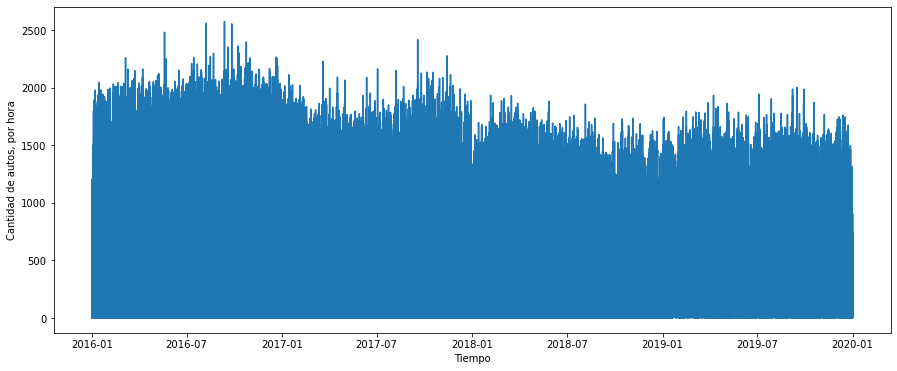

In [20]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [21]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1461, 1)


cantidad_pasos
fecha                     
2016-01-01           25602
2016-01-02           36136
2016-01-03           37225
2016-01-04           50312
2016-01-05           49907

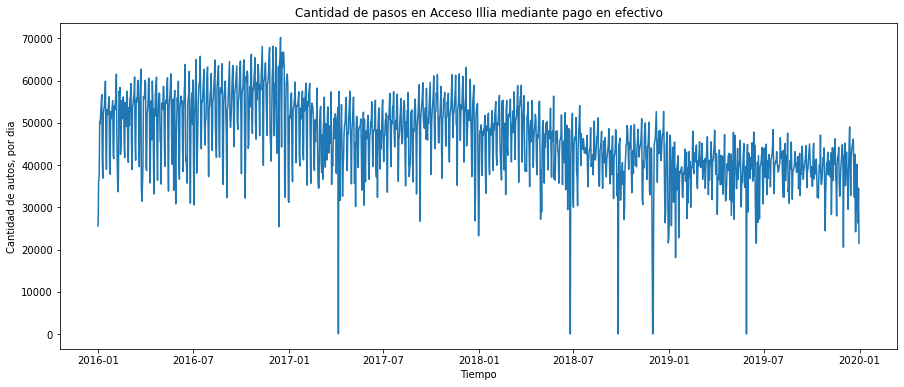

In [22]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title("Cantidad de pasos en Acceso Illia mediante pago en efectivo")
plt.show()

Ahora vamos a analizar si trabajamos con la estación **Illia** y todos los medios de pago

In [23]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_todoslosmedios = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia
mask = (dataset_todoslosmedios.estacion=='Illia')
dataset_todoslosmedios = dataset_todoslosmedios[mask]

#Quitamos las columnas que no vamos a utilizar
dataset_todoslosmedios.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset_todoslosmedios.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
19  2019-01-01         1  Martes     Centro       Liviano             146
20  2019-01-01         1  Martes     Centro       Liviano              59
21  2019-01-01         1  Martes     Centro        Pesado               1
22  2019-01-01         1  Martes  Provincia       Liviano             147
23  2019-01-01         1  Martes  Provincia       Liviano             106

In [24]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_todoslosmedios['fecha2'] = pd.to_datetime(dataset_todoslosmedios.fecha) + pd.to_timedelta(dataset_todoslosmedios.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_todoslosmedios.drop(columns=['fecha','hora_fin'], inplace = True)

dataset_todoslosmedios.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
19  Martes     Centro       Liviano             146 2019-01-01 01:00:00
20  Martes     Centro       Liviano              59 2019-01-01 01:00:00
21  Martes     Centro        Pesado               1 2019-01-01 01:00:00
22  Martes  Provincia       Liviano             147 2019-01-01 01:00:00
23  Martes  Provincia       Liviano             106 2019-01-01 01:00:00

In [25]:
#Corregimos el nombre de fecha2 a fecha
dataset_todoslosmedios.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset_todoslosmedios.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
19  Martes     Centro       Liviano             146 2019-01-01 01:00:00
20  Martes     Centro       Liviano              59 2019-01-01 01:00:00
21  Martes     Centro        Pesado               1 2019-01-01 01:00:00
22  Martes  Provincia       Liviano             147 2019-01-01 01:00:00
23  Martes  Provincia       Liviano             106 2019-01-01 01:00:00

In [26]:
#Reordenamos el dataset por fecha
dataset_todoslosmedios.sort_values('fecha', inplace = True)
dataset_todoslosmedios.reset_index(drop=True, inplace = True)
dataset_todoslosmedios

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo     Centro       Liviano             459 2017-01-01 00:00:00
1       Domingo  Provincia        Pesado               3 2017-01-01 00:00:00
2       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
3       Domingo  Provincia        Pesado               7 2017-01-01 00:00:00
4       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
752547   Martes     Centro       Liviano             122 2019-12-31 23:00:00
752548   Martes     Centro       Liviano               3 2019-12-31 23:00:00
752549   Martes     Centro       Liviano               4 2019-12-31 23:00:00
752550   Martes     Centro       Liviano               1 2019-12-31 23:00:00
752551   Martes     Centro       Liviano             214 2019-12-31 23:00:00

[752552 rows x 5 columns]

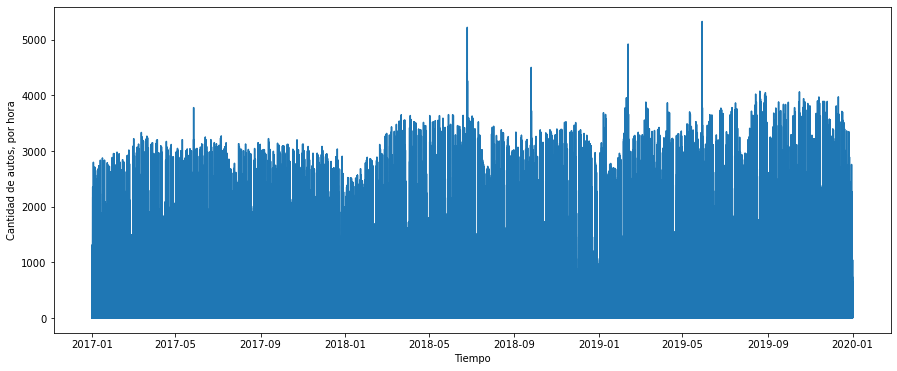

In [27]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset_todoslosmedios.fecha, dataset_todoslosmedios.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [28]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_todoslosmedios = dataset_todoslosmedios.resample('D', on = 'fecha').sum()
print(diario_todoslosmedios.shape)
diario_todoslosmedios.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           45478
2017-01-02           89289
2017-01-03           92602
2017-01-04           95813
2017-01-05          100044

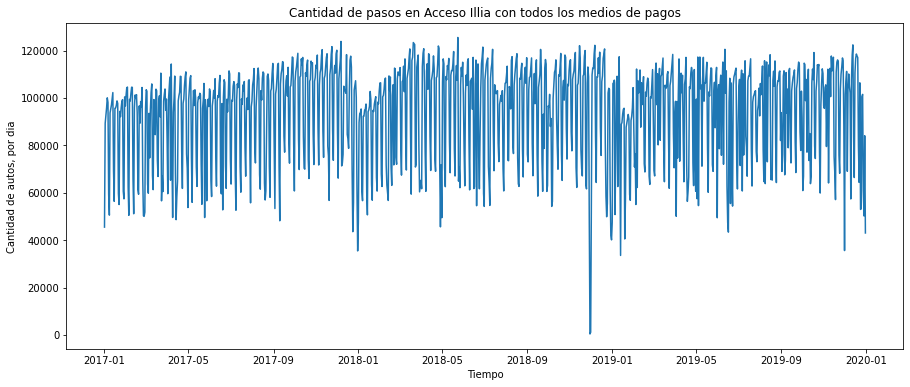

In [29]:
plt.figure(figsize = (15,6))
plt.plot(diario_todoslosmedios.index, diario_todoslosmedios.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title("Cantidad de pasos en Acceso Illia con todos los medios de pagos")
plt.show()

Aplico un nuevo filtrado, en este caso estación **Illia** y la forma de pago **Efectivo** y **Telepase**

In [30]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_efvo_telepase = pd.concat([data_2019, data_2018, data_2017, data_2016])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo y Telepase

dataset_efvo_telepase = dataset_efvo_telepase[(dataset_efvo_telepase.estacion =='Illia')]

dataset_efvo_telepase = dataset_efvo_telepase[(dataset_efvo_telepase.forma_pago =='EFECTIVO') | (dataset_efvo_telepase.forma_pago =='TELEPASE')]

#Quitamos las columnas que no vamos a utilizar
dataset_efvo_telepase.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset_efvo_telepase.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
20  2019-01-01         1  Martes     Centro       Liviano              59
21  2019-01-01         1  Martes     Centro        Pesado               1
23  2019-01-01         1  Martes  Provincia       Liviano             106
25  2019-01-01         1  Martes  Provincia        Pesado               2
80  2019-01-01         2  Martes     Centro       Liviano             537

In [31]:
#dataset_efvo_telepase.forma_pago.unique()

In [32]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_efvo_telepase['fecha2'] = pd.to_datetime(dataset_efvo_telepase.fecha) + pd.to_timedelta(dataset_efvo_telepase.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_efvo_telepase.drop(columns=['fecha','hora_fin'], inplace = True)

dataset_efvo_telepase.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
20  Martes     Centro       Liviano              59 2019-01-01 01:00:00
21  Martes     Centro        Pesado               1 2019-01-01 01:00:00
23  Martes  Provincia       Liviano             106 2019-01-01 01:00:00
25  Martes  Provincia        Pesado               2 2019-01-01 01:00:00
80  Martes     Centro       Liviano             537 2019-01-01 02:00:00

In [33]:
#Corregimos el nombre de fecha2 a fecha
dataset_efvo_telepase.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset_efvo_telepase.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
20  Martes     Centro       Liviano              59 2019-01-01 01:00:00
21  Martes     Centro        Pesado               1 2019-01-01 01:00:00
23  Martes  Provincia       Liviano             106 2019-01-01 01:00:00
25  Martes  Provincia        Pesado               2 2019-01-01 01:00:00
80  Martes     Centro       Liviano             537 2019-01-01 02:00:00

In [34]:
#Reordenamos el dataset por fecha
dataset_efvo_telepase.sort_values('fecha', inplace = True)
dataset_efvo_telepase.reset_index(drop=True, inplace = True)
dataset_efvo_telepase

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Viernes     Centro       Liviano             649 2016-01-01 00:00:00
1       Viernes     Centro        Pesado               1 2016-01-01 00:00:00
2       Viernes     Centro        Pesado               2 2016-01-01 00:00:00
3       Viernes     Centro        Pesado               1 2016-01-01 00:00:00
4       Viernes     Centro        Pesado              13 2016-01-01 00:00:00
...         ...        ...           ...             ...                 ...
629837   Martes  Provincia        Pesado               1 2019-12-31 23:00:00
629838   Martes  Provincia       Liviano             110 2019-12-31 23:00:00
629839   Martes  Provincia       Liviano             190 2019-12-31 23:00:00
629840   Martes     Centro       Liviano             122 2019-12-31 23:00:00
629841   Martes     Centro       Liviano             214 2019-12-31 23:00:00

[629842 rows x 5 columns]

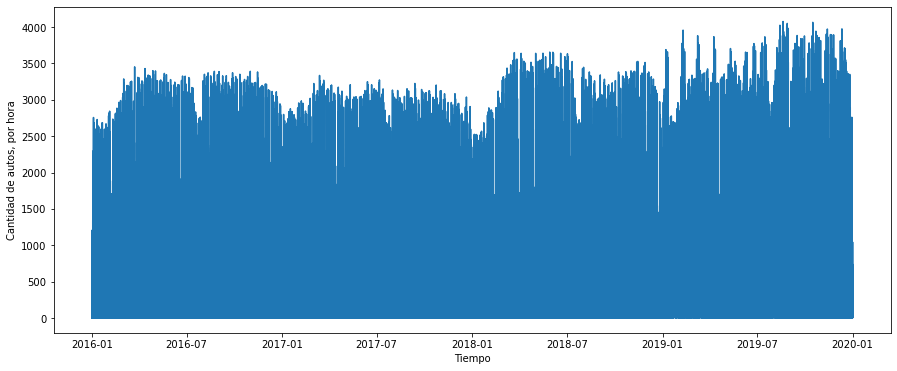

In [35]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset_efvo_telepase.fecha, dataset_efvo_telepase.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [36]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
dataset_efvo_telepase = dataset_efvo_telepase.resample('D', on = 'fecha').sum()
print(dataset_efvo_telepase.shape)
dataset_efvo_telepase.head()

(1461, 1)


cantidad_pasos
fecha                     
2016-01-01           34924
2016-01-02           48481
2016-01-03           49588
2016-01-04           86048
2016-01-05           86814

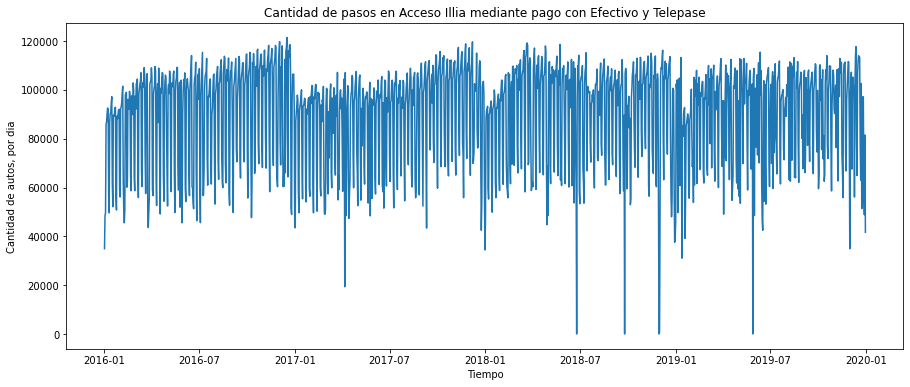

In [37]:
plt.figure(figsize = (15,6))
plt.plot(dataset_efvo_telepase.index, dataset_efvo_telepase.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title("Cantidad de pasos en Acceso Illia mediante pago con Efectivo y Telepase")
plt.show()

Ahora filtramos tomando únicamente **Telepase**

In [38]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_telepase = pd.concat([data_2019, data_2018, data_2017, data_2016])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset_telepase.estacion=='Illia', dataset_telepase.forma_pago == 'TELEPASE')
dataset_telepase = dataset_telepase[mask]

#Quitamos las columnas que no vamos a utilizar
dataset_telepase.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset_telepase.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
20  2019-01-01         1  Martes     Centro       Liviano              59
21  2019-01-01         1  Martes     Centro        Pesado               1
23  2019-01-01         1  Martes  Provincia       Liviano             106
25  2019-01-01         1  Martes  Provincia        Pesado               2
85  2019-01-01         2  Martes     Centro       Liviano             507

In [39]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_telepase['fecha2'] = pd.to_datetime(dataset_telepase.fecha) + pd.to_timedelta(dataset_telepase.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_telepase.drop(columns=['fecha','hora_fin'], inplace = True)

dataset_telepase.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
20  Martes     Centro       Liviano              59 2019-01-01 01:00:00
21  Martes     Centro        Pesado               1 2019-01-01 01:00:00
23  Martes  Provincia       Liviano             106 2019-01-01 01:00:00
25  Martes  Provincia        Pesado               2 2019-01-01 01:00:00
85  Martes     Centro       Liviano             507 2019-01-01 02:00:00

In [40]:
#Corregimos el nombre de fecha2 a fecha
dataset_telepase.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset_telepase.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
20  Martes     Centro       Liviano              59 2019-01-01 01:00:00
21  Martes     Centro        Pesado               1 2019-01-01 01:00:00
23  Martes  Provincia       Liviano             106 2019-01-01 01:00:00
25  Martes  Provincia        Pesado               2 2019-01-01 01:00:00
85  Martes     Centro       Liviano             507 2019-01-01 02:00:00

In [41]:
#Reordenamos el dataset por fecha
dataset_telepase.sort_values('fecha', inplace = True)
dataset_telepase.reset_index(drop=True, inplace = True)
dataset_telepase

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Viernes  Provincia        Pesado               5 2016-01-01 00:00:00
1       Viernes  Provincia       Liviano             141 2016-01-01 00:00:00
2       Viernes     Centro        Pesado               1 2016-01-01 00:00:00
3       Viernes     Centro        Pesado               1 2016-01-01 00:00:00
4       Viernes     Centro        Pesado               6 2016-01-01 00:00:00
...         ...        ...           ...             ...                 ...
283271   Martes     Centro        Pesado               4 2019-12-31 22:00:00
283272   Martes     Centro       Liviano             630 2019-12-31 22:00:00
283273   Martes  Provincia       Liviano             110 2019-12-31 23:00:00
283274   Martes     Centro       Liviano             122 2019-12-31 23:00:00
283275   Martes  Provincia        Pesado               1 2019-12-31 23:00:00

[283276 rows x 5 columns]

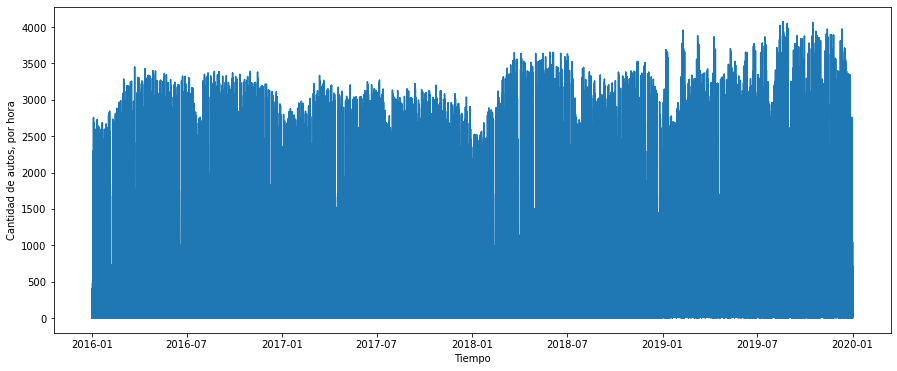

In [42]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset_telepase.fecha, dataset_telepase.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [43]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_telepase = dataset_telepase.resample('D', on = 'fecha').sum()
print(diario_telepase.shape)
diario_telepase.head()

(1461, 1)


cantidad_pasos
fecha                     
2016-01-01            9322
2016-01-02           12345
2016-01-03           12363
2016-01-04           35736
2016-01-05           36907

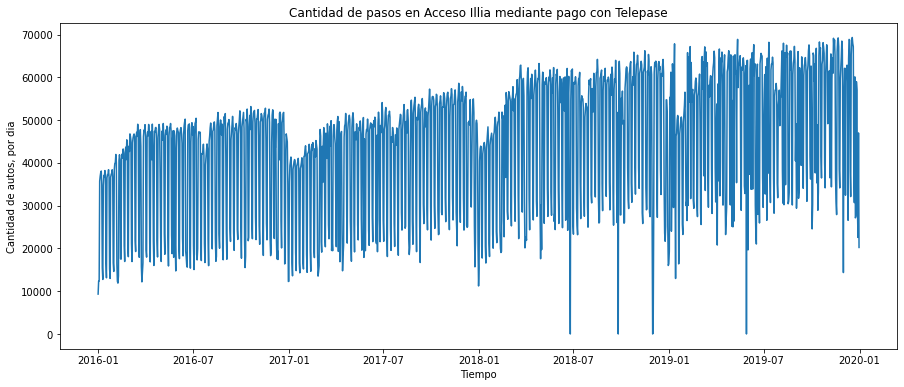

In [44]:
plt.figure(figsize = (15,6))
plt.plot(diario_telepase.index, diario_telepase.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title("Cantidad de pasos en Acceso Illia mediante pago con Telepase")
plt.show()

Luego de analizar y graficar distintas alternativas se va a seleccionar la opción de Illia y filtrando como pago Efectivo y Telepase que son los más representativos de este atributo. 

In [45]:
dataset_efvo_telepase

cantidad_pasos
fecha                     
2016-01-01           34924
2016-01-02           48481
2016-01-03           49588
2016-01-04           86048
2016-01-05           86814
...                    ...
2019-12-27           97217
2019-12-28           59664
2019-12-29           48836
2019-12-30           81524
2019-12-31           41679

[1461 rows x 1 columns]

In [46]:
# Convertimos en nan los valores atípicos, para eso tomamos un filtro de cantidad de pasos menor
dataset_efvo_telepase.cantidad_pasos[dataset_efvo_telepase.cantidad_pasos < 15000] = np.nan

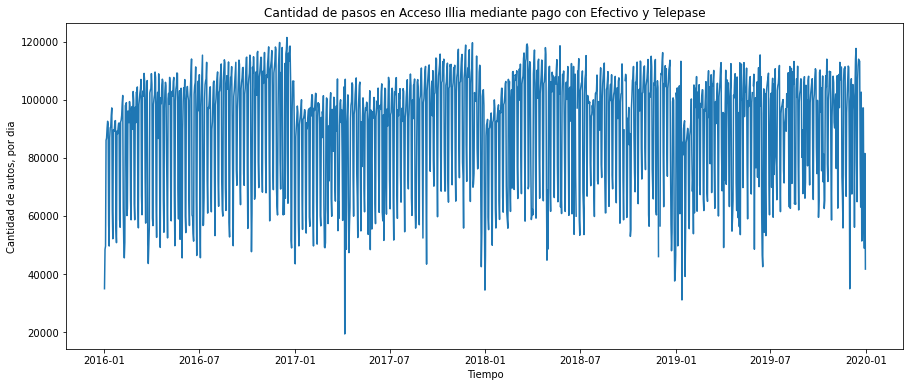

In [47]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, dataset_efvo_telepase.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title("Cantidad de pasos en Acceso Illia mediante pago con Efectivo y Telepase")
plt.show()

In [48]:
# Vemos cuántos valores nulos tenemos en el dataset
dataset_efvo_telepase.isna().sum()

cantidad_pasos    5
dtype: int64

In [49]:
valores_atipicos = dataset_efvo_telepase.isnull().any(axis=1)
valores_atipicos

fecha
2016-01-01    False
2016-01-02    False
2016-01-03    False
2016-01-04    False
2016-01-05    False
              ...  
2019-12-27    False
2019-12-28    False
2019-12-29    False
2019-12-30    False
2019-12-31    False
Freq: D, Length: 1461, dtype: bool

In [50]:
# Observo en qué fechas se encuentran los valores nulos
valores_atipicos = dataset_efvo_telepase[dataset_efvo_telepase.isnull().any(axis=1)]
valores_atipicos

cantidad_pasos
fecha                     
2018-06-25             NaN
2018-09-25             NaN
2018-11-30             NaN
2018-12-01             NaN
2019-05-29             NaN

In [51]:
valores_atipicos.index[0]

Timestamp('2018-06-25 00:00:00')

In [52]:
#Imputar los valores a una semana - con interpolate hace interpolación lineal (con el valor medio del siguiente y del anterior)
dataset_efvo_telepase = dataset_efvo_telepase.interpolate()

In [53]:
#diario_telepase = diario_telepase.dropna()

In [54]:
dataset_efvo_telepase.isna().sum()

cantidad_pasos    0
dtype: int64

## Modelo de Machine Learning

#### f. Desarrolla tu modelo

#### g. Optimiza los hiper parámetros de tu modelo.

#### h. Elige el modelo benchmark para comparar los resultados de tu modelo

#### i. Responde, ¿qué información está usando el modelo para predecir? 

In [55]:
# Definimos la ventana a analizar
ventana = int(365/7) #años en semanas - Necesito un múltiplo del periodo de la estacionalidad, en este caso un año
semanal_tendencia = dataset_efvo_telepase.cantidad_pasos.rolling(window=ventana, center = True).mean()
semanal_tendencia

fecha
2016-01-01   NaN
2016-01-02   NaN
2016-01-03   NaN
2016-01-04   NaN
2016-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_pasos, Length: 1461, dtype: float64

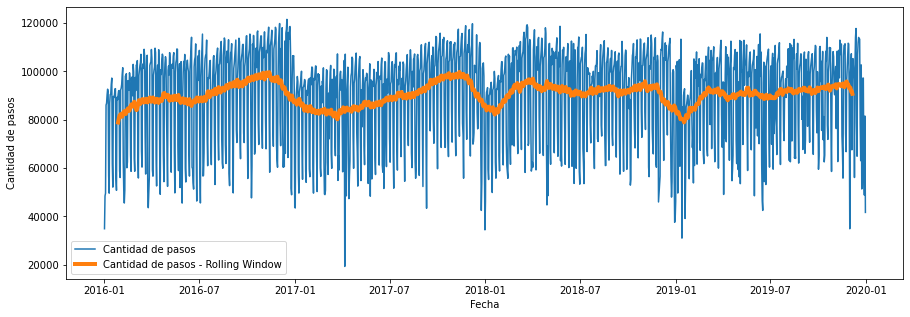

In [56]:
plt.figure(figsize = (15,5))
plt.plot(dataset_efvo_telepase.index, dataset_efvo_telepase.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(semanal_tendencia, lw = 4, label = 'Cantidad de pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

In [57]:
dataset_efvo_telepase

cantidad_pasos
fecha                     
2016-01-01         34924.0
2016-01-02         48481.0
2016-01-03         49588.0
2016-01-04         86048.0
2016-01-05         86814.0
...                    ...
2019-12-27         97217.0
2019-12-28         59664.0
2019-12-29         48836.0
2019-12-30         81524.0
2019-12-31         41679.0

[1461 rows x 1 columns]

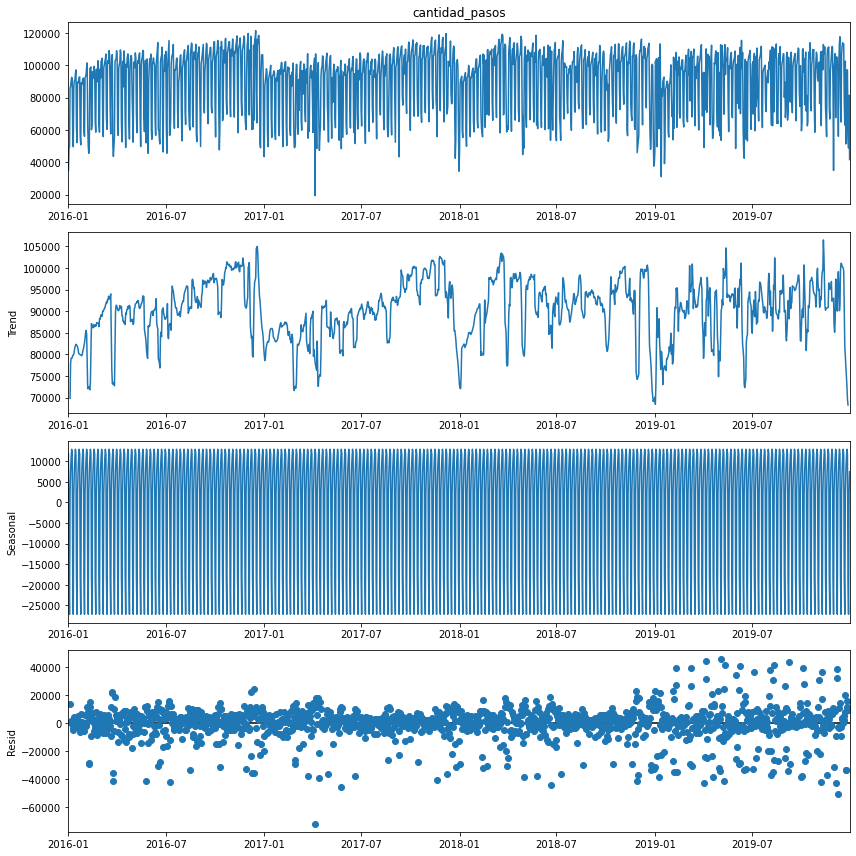

In [58]:
import matplotlib
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dataset_efvo_telepase.cantidad_pasos, model='additive', period=7) # ver de comparar semanal/mensual y anual
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()


In [59]:
result.seasonal.head(14) # valores por encima/debajo de la media 

fecha
2016-01-01    11706.533099
2016-01-02   -17984.623036
2016-01-03   -27129.795093
2016-01-04     2414.872957
2016-01-05     7428.428246
2016-01-06    10692.954345
2016-01-07    12871.629482
2016-01-08    11706.533099
2016-01-09   -17984.623036
2016-01-10   -27129.795093
2016-01-11     2414.872957
2016-01-12     7428.428246
2016-01-13    10692.954345
2016-01-14    12871.629482
Freq: D, Name: seasonal, dtype: float64

In [60]:
result.seasonal

fecha
2016-01-01    11706.533099
2016-01-02   -17984.623036
2016-01-03   -27129.795093
2016-01-04     2414.872957
2016-01-05     7428.428246
                  ...     
2019-12-27    11706.533099
2019-12-28   -17984.623036
2019-12-29   -27129.795093
2019-12-30     2414.872957
2019-12-31     7428.428246
Freq: D, Name: seasonal, Length: 1461, dtype: float64

### Predicción a Futuro

#### One-Step Prediction


In [61]:
senial = dataset_efvo_telepase.cantidad_pasos # lo pasa numpy array
senial.head()

fecha
2016-01-01    34924.0
2016-01-02    48481.0
2016-01-03    49588.0
2016-01-04    86048.0
2016-01-05    86814.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [62]:
look_back = 365 # corresponde a días *VER

In [63]:
N = senial.shape[0]
N
X = np.zeros((N - look_back - 1,look_back))

y = np.zeros(N - look_back - 1)

print(X.shape, y.shape)

(1095, 365) (1095,)


In [64]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]
    #print(X[i,:])

In [65]:
print(X)

[[ 34924.  48481.  49588. ... 106055. 106468.  93503.]
 [ 48481.  49588.  86048. ... 106468.  93503.  43794.]
 [ 49588.  86048.  86814. ...  93503.  43794.  43509.]
 ...
 [ 99887.  60724.  37572. ...  51900.  97159.  97217.]
 [ 60724.  37572.  39000. ...  97159.  97217.  59664.]
 [ 37572.  39000.  46394. ...  97217.  59664.  48836.]]


In [66]:
#print(y)

In [67]:
N_total = X.shape[0] 
N_train = int(0.8*N_total)
N_test = N_total - N_train

#N_train = 3*365 - look_back # cantidad de instancias que vamos a usar para entrenar. 
#N_test = 1*365 #cantidad de puntos que vamos a usar para evaluar
#N_total = N_train + N_test

length_total = N_train + N_test + look_back
print(length_total) 


X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

1460
(876, 365) (876,)
(219, 365) (219,)


In [68]:
# Importo las librerías que voy a utilizar para desarrollar el modelo
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import scipy as sp
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, make_scorer
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [69]:
# Optimización de hiperparámetros

modelo_rfr = RandomForestRegressor(oob_score=True, n_jobs= -1)

#modelo = RandomForestRegressor()
param_trees = {'n_estimators': [25, 50, 100, 150, 200], 
               'max_depth': sp.stats.randint(1, 20), 
               'min_samples_leaf':sp.stats.randint(1, 7)}

# Utilizo un Random Search por ser más eficiente que el Grid Search en el uso computacional
rfr_rs = RandomizedSearchCV(modelo_rfr, cv=5, param_distributions= param_trees)

rfr_rs.fit(X_train, y_train)

print("Mejor Hiperparámetro: ", rfr_rs.best_params_)
print("Mejor Resultado: ", rfr_rs.best_score_)
print("Mejor Modelo: ", rfr_rs.best_estimator_)

Mejor Hiperparámetro:  {'max_depth': 9, 'min_samples_leaf': 5, 'n_estimators': 200}
Mejor Resultado:  0.5967704263913831
Mejor Modelo:  RandomForestRegressor(max_depth=9, min_samples_leaf=5, n_estimators=200,
                      n_jobs=-1, oob_score=True)


In [70]:
# Optimización de hiperparámetros

#modelo_rfr_gs = RandomForestRegressor(oob_score=True, n_jobs= -1)

#modelo = RandomForestRegressor()
#param_trees = {'n_estimators': [25, 50, 100, 150, 200], 
               #'max_depth': [1, 3, 5, 10, 15], 
               #'min_samples_leaf':[1, 3, 5, 7]}

# Utilizo un Random Search por ser más eficiente que el Grid Search en el uso computacional
#rfr_gs = GridSearchCV(estimator = modelo_rfr_gs, cv=5, param_grid= param_trees)

#rfr_gs.fit(X_train, y_train)

#print("Mejor Hiperparámetro: ", rfr_gs.best_params_)
#print("Mejor Resultado: ", rfr_gs.best_score_)
#print("Mejor Modelo: ", rfr_gs.best_estimator_)

In [71]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs = 4, max_depth = 9, min_samples_leaf= 1).fit(X_train,y_train)

In [72]:
# Utilizar modelo de regresión / se puede sumar regularización

Graficamos la importancia de cada feature.

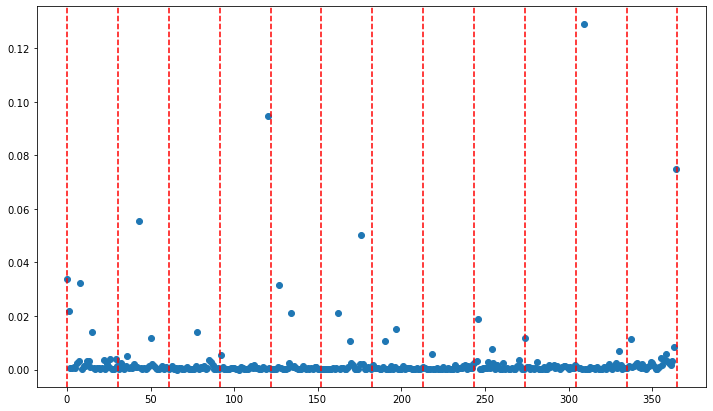

In [73]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(13)*30.42:
    plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

¿A qué atributos les da importancia? Interpretar. Hay dos líneas que puedes descomentar en la celda anterior para ayudarte. 

En el gráfico se establecen líneas que representan la división por meses en el año de manera aproximada. En función a lo que se puede ver en el gráfico, se le da mayor importancia a los a los atributos que se encuentran a fin/comienzo de mes. Uno de los atributos que tiene mayor importancia es el día anterior, que es el último punto que se puede observar.

Predecimos.

In [74]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

Y graficamos. Este gráfico también puede ser confuso, por lo que presta atención a cada línea. Si quieres, puedes ir comentando y descomentando cada línea para ver bien qué está haciendo y que el gráfico no quede tan sobrecargado.

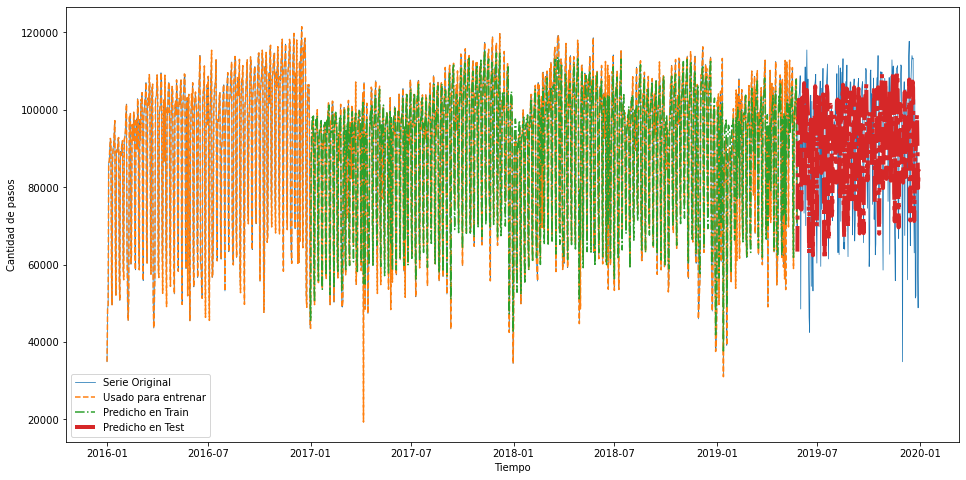

In [75]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

¿Qué les parecen, visualmente, estos resultados?

Calculamos el error RMSE en train y test.

In [76]:
MSE_onestep_rfr_train = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE_onestep_rfr_train))

MSE_onestep_rfr_test = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE_onestep_rfr_test))

Error en Train: 5663.631536937054
Error en Test: 15935.134330397701


**Benchmark**: comparamos el error con el que habríamos obtenido si predecíamos copiando el valor de la fecha anterior.

In [77]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1] #modelo en el que el valor de autos que pasa hoy es el mismo que el que pasa mañana

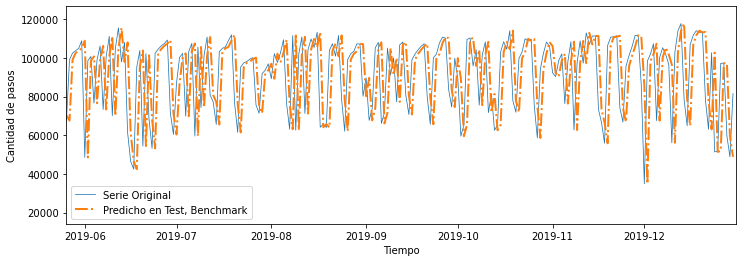

In [78]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

In [79]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE_benchmark = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print('Error en Test en función MSE:',np.sqrt(MSE_benchmark))

Error en Test en función MSE: 24084.827717710185


In [80]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MAE_benchmark = mean_absolute_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print('Error en Test en función MAE:',MAE_benchmark)

17772.776255707762


In [81]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MAPE_benchmark = mean_absolute_percentage_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print('Error en Test en función MAPE:',MAPE_benchmark)

0.22166043591713547


Con el modelo ya entrenado, vamos a usar el método recursivo para hacer 

***Multi-Step prediction***

In [82]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

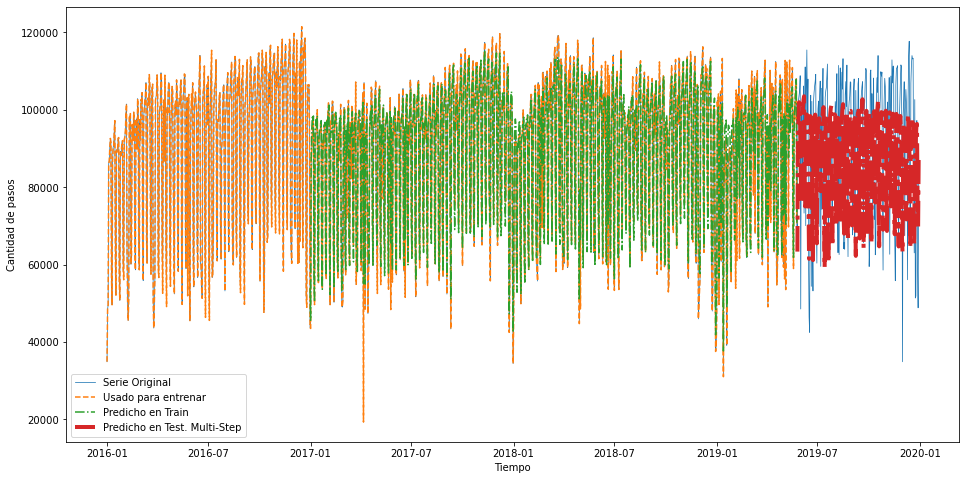

In [83]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

Y calculamos el error RMSE

In [84]:
MSE_multistep_test = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Test:',np.sqrt(MSE_multistep_test))


Error en Test: 16344.149971720815


## Investigación

#### j. Plantea nuevas preguntas en base al trabajo que hiciste y en las que se pueda ahondar.

#### h. Plantea un flujo de trabajo que responda alguna o algunas de esas preguntas.

Vamos a aplicar un nuevo modelo y luego compararlo con el modelo anterior y así analizar cuál es conveniente elegir. El flujo de trabajo es similar al anterior y se irá comentando a medida que avanzamos.

## Requerimientos adicionales

#### Implementa el flujo de trabajo planteado.

**Modelo Regresión Lineal**

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lr = LinearRegression()

In [87]:
lr.fit(X_train,y_train)

LinearRegression()

In [88]:
y_pred = lr.predict(X)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

Graficamos el modelo y su desempeño en cada etapa

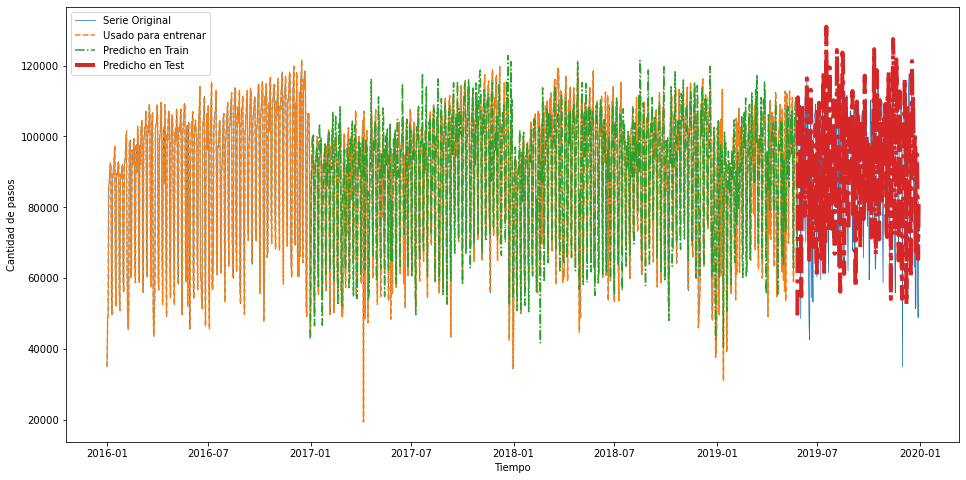

In [89]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

Calculamos el error RMSE en train y test.

In [90]:
MSE_onestep_lr_train = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE_onestep_lr_train))

MSE_onestep_lr_test = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE_onestep_lr_test))

Error en Train: 9859.876298440591
Error en Test: 21059.649785070887


Multi-step

In [91]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = lr.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

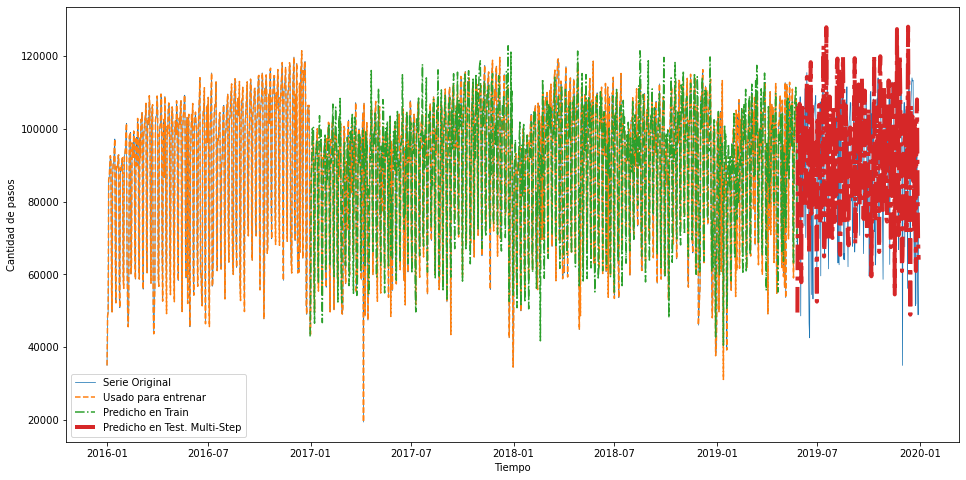

In [92]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

Y calculamos el error RMSE

In [93]:
MSE_multistep_lr_test = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Test:',np.sqrt(MSE_multistep_lr_test))


Error en Test: 20153.027549788447


**Regularización con Ridge**

In [94]:
from sklearn.linear_model import Ridge, Lasso


In [95]:
# Aplicamos un for para ver qué alpha es conveniente utilizar
train_errors  = []
test_errors = []

for alpha in [1e8, 1e10, 1e12, 1e13, 1e14]:
#for alpha in [10, 1, 0.1 ,0.01, 0.001]:
#for alpha in [0.001]:

    reg_ridge = Ridge(alpha= alpha)
    reg_ridge.fit(X_train,y_train)
    
    y_train_pred = reg_ridge.predict(X_train)
    y_test_pred = reg_ridge.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    train_errors.append(rmse_train)
    test_errors.append(rmse_test)
    
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 9859.885345845956
Raíz del error cuadrático medio en Test: 21041.432091071925
Raíz del error cuadrático medio en Train: 9912.293247361644
Raíz del error cuadrático medio en Test: 19786.502174552348
Raíz del error cuadrático medio en Train: 12276.385223358717
Raíz del error cuadrático medio en Test: 16521.11772508369
Raíz del error cuadrático medio en Train: 14022.403498804155
Raíz del error cuadrático medio en Test: 16673.99900496921
Raíz del error cuadrático medio en Train: 17830.15868438796
Raíz del error cuadrático medio en Test: 18011.317759724043


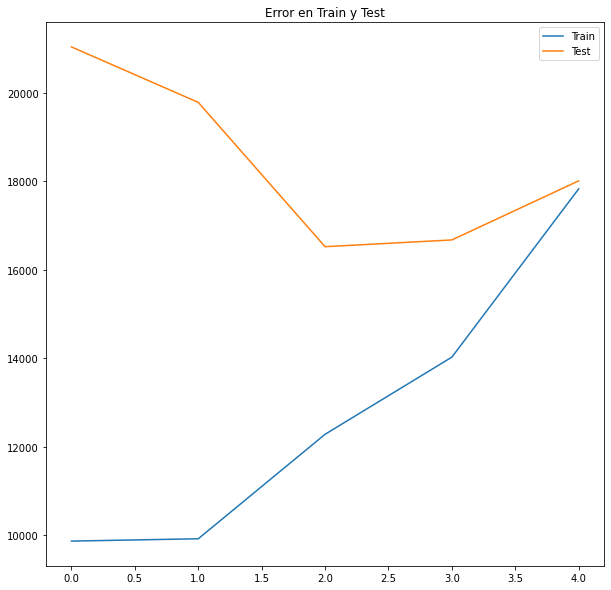

In [96]:
plt.figure(figsize=(10,10))
plt.plot(train_errors, label= "Train")
plt.plot(test_errors, label= "Test")
plt.title("Error en Train y Test")
plt.legend()

In [97]:
reg_ridge = Ridge(alpha= 1e12).fit(X_train,y_train)

In [98]:
y_pred = reg_ridge.predict(X)
y_train_pred = reg_ridge.predict(X_train)
y_test_pred = reg_ridge.predict(X_test)

Y graficamos. Este gráfico también puede ser confuso, por lo que presta atención a cada línea. Si quieres, puedes ir comentando y descomentando cada línea para ver bien qué está haciendo y que el gráfico no quede tan sobrecargado.

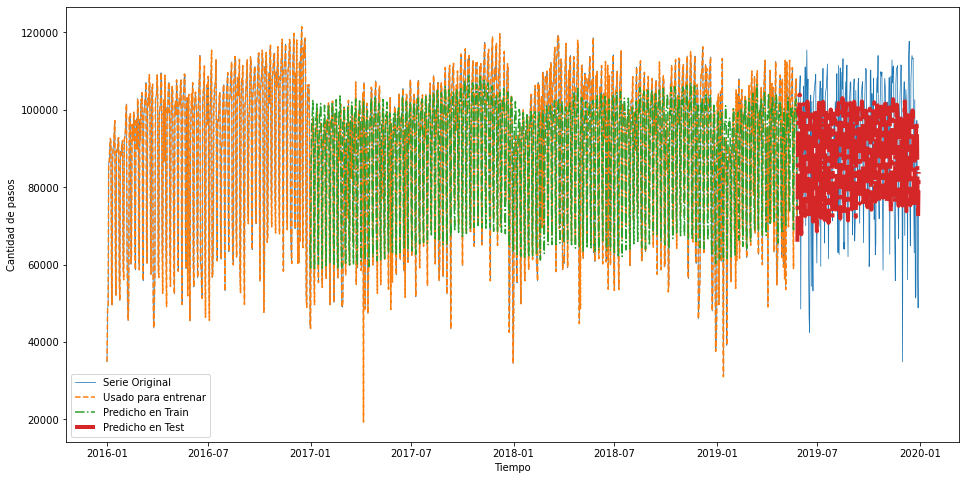

In [99]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

¿Qué les parecen, visualmente, estos resultados?

Calculamos el error RMSE en train y test.

In [100]:
MSE_onestep_ridge_train = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE_onestep_ridge_train))

MSE_onestep_ridge_test = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE_onestep_ridge_test))

Error en Train: 12276.385223358717
Error en Test: 16521.11772508369


Multi-step

In [101]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = reg_ridge.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

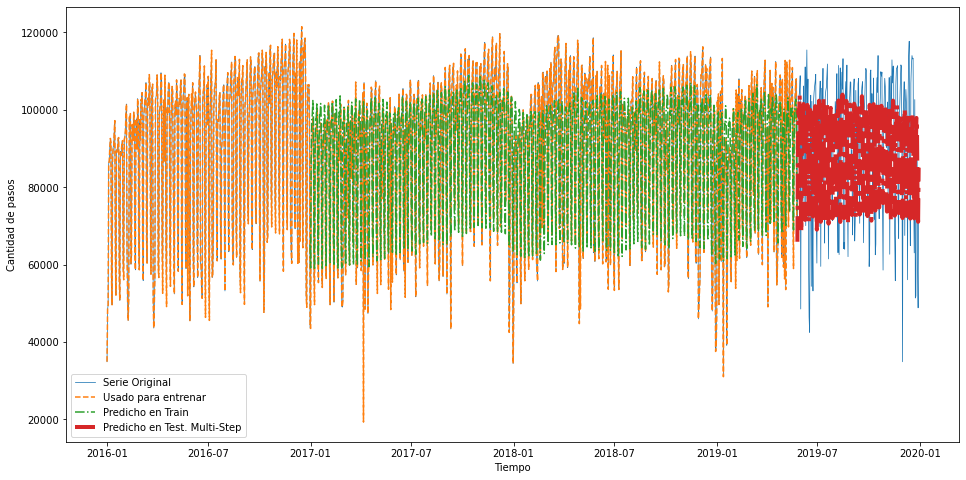

In [102]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

Y calculamos el error RMSE

In [103]:
MSE_multistep_ridge_test = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Test:',np.sqrt(MSE_multistep_ridge_test))

Error en Test: 16486.385965679852


Comparo los modelos

In [104]:
print("Los resultados finales fueron:\n - RMSE de Random Forest:", np.sqrt(MSE_onestep_rfr_test)," \n - RMSE de Modelo Benchmark:", np.sqrt(MSE_benchmark), " \n - RMSE de Regresión Lineal:", np.sqrt(MSE_onestep_lr_test),
     "\n - RMSE de Regresión con Ridge", np.sqrt(MSE_onestep_ridge_test))

Los resultados finales fueron:
 - RMSE de Random Forest: 15935.134330397701  
 - RMSE de Modelo Benchmark: 24084.827717710185  
 - RMSE de Regresión Lineal: 21059.649785070887 
 - RMSE de Regresión con Ridge 16521.11772508369


Vamos a comparar como funcionan los modelos en el test y en el train

In [105]:
def evaluar_regresion(model, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
     
    print(f'Model: {model}')
    
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (14,7))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_train,y_train_pred, s =2)
    ax.scatter(y_test,y_test_pred, s =2)
    


    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

Model: RandomForestRegressor(max_depth=9, n_estimators=50, n_jobs=4, random_state=42)
Raíz del error cuadrático medio en Train: 5663.631536937053
Raíz del error cuadrático medio en Test: 15935.134330397703


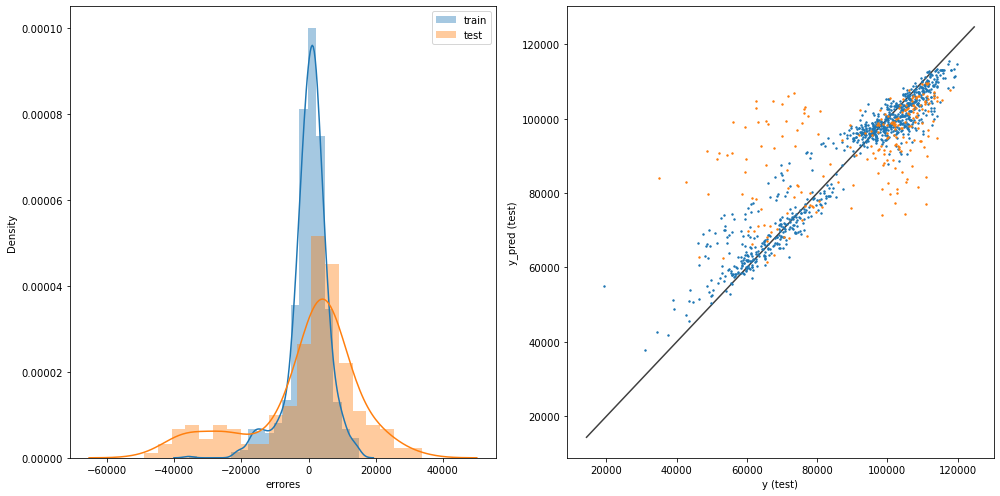

Model: LinearRegression()
Raíz del error cuadrático medio en Train: 9859.876298440591
Raíz del error cuadrático medio en Test: 21059.649785070887


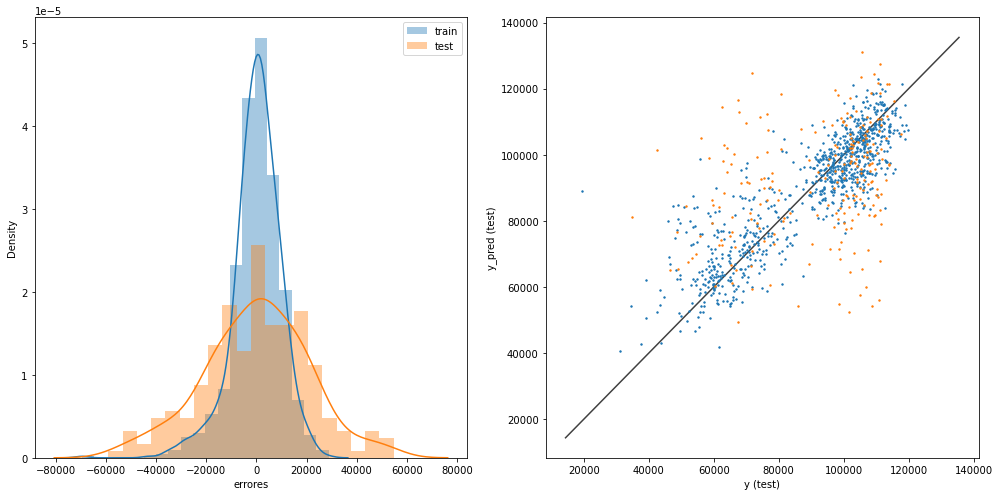

Model: Ridge(alpha=1000000000000.0)
Raíz del error cuadrático medio en Train: 12276.385223358717
Raíz del error cuadrático medio en Test: 16521.11772508369


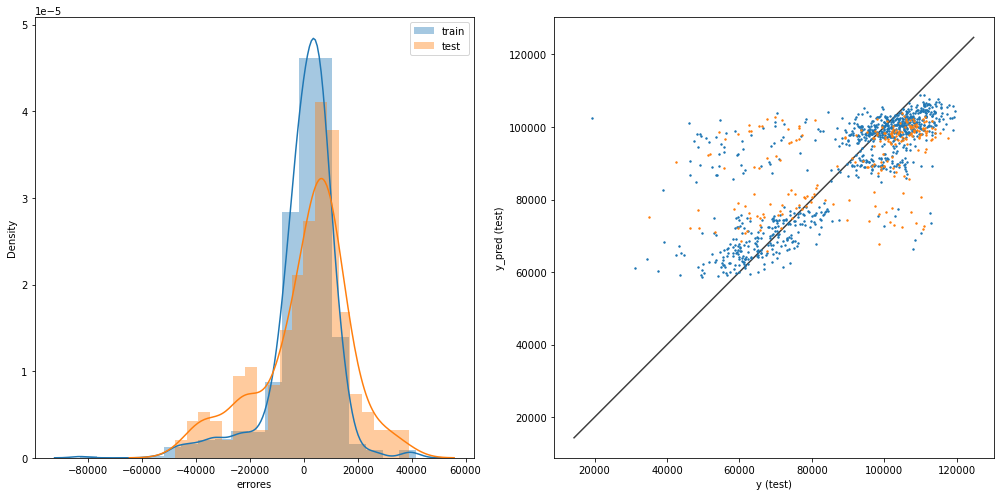

In [106]:
for model in [rf, lr, reg_ridge]:
    evaluar_regresion(model,X_train,X_test,y_train,y_test)

El modelo suele subestimar ya que los puntos se encuentran debajo de la recta.
Esto ocurre por el hecho de haber elegido datos de train y test estrictamente separados y no aleatoriamente separados. Pero hacerlo de manera aleatoria me podría llevar a qué el modelo no prediga correctamente. 
No es simétrica la campana por lo que suele errar más con errores negativos. Es decir que el modelo tiene mayor error cuando los valores predichos son mayores a los valores reales. Así como se puede ver en el gráfico de campana, también en el de dispersión, donde los puntos más alejados son los que se encuentran por encima de la recta (predigo que pasan 50 autos y pasan 10).
Podemos ver que los valores de test y train se encuentran con la misma dispersión, es decir se extienden sobre lo largo de la recta. No se puede ver una clara tendencia.


Podemos ver que el mejor modelo que reduce el error es el Random Forest, el primero implementado.

Además de comparar el RMSE vemos otras métricas de error.

In [107]:
def evaluar_MAE(model, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    print(f'Model: {model}')
    
    print(f'Raíz del error cuadrático medio en Train: {mae_train}')
    print(f'Raíz del error cuadrático medio en Test: {mae_test}')


In [108]:
for model in [rf, lr, reg_ridge]:
    evaluar_MAE(model,X_train,X_test,y_train,y_test)

Model: RandomForestRegressor(max_depth=9, n_estimators=50, n_jobs=4, random_state=42)
Raíz del error cuadrático medio en Train: 3986.9901813150364
Raíz del error cuadrático medio en Test: 11494.649713901415
Model: LinearRegression()
Raíz del error cuadrático medio en Train: 7178.9571016897535
Raíz del error cuadrático medio en Test: 16375.13435432037
Model: Ridge(alpha=1000000000000.0)
Raíz del error cuadrático medio en Train: 8184.122522987764
Raíz del error cuadrático medio en Test: 12637.551473734216


In [109]:
def evaluar_MAPE(model, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    
    print(f'Model: {model}')
    
    print(f'Raíz del error cuadrático medio en Train: {mape_train}')
    print(f'Raíz del error cuadrático medio en Test: {mape_test}')

In [110]:
for model in [rf, lr, reg_ridge]:
    evaluar_MAPE(model,X_train,X_test,y_train,y_test)

Model: RandomForestRegressor(max_depth=9, n_estimators=50, n_jobs=4, random_state=42)
Raíz del error cuadrático medio en Train: 0.05191677255375127
Raíz del error cuadrático medio en Test: 0.1524967889842388
Model: LinearRegression()
Raíz del error cuadrático medio en Train: 0.09385682815119106
Raíz del error cuadrático medio en Test: 0.2021492041032228
Model: Ridge(alpha=1000000000000.0)
Raíz del error cuadrático medio en Train: 0.11236448761977103
Raíz del error cuadrático medio en Test: 0.16150627597525982


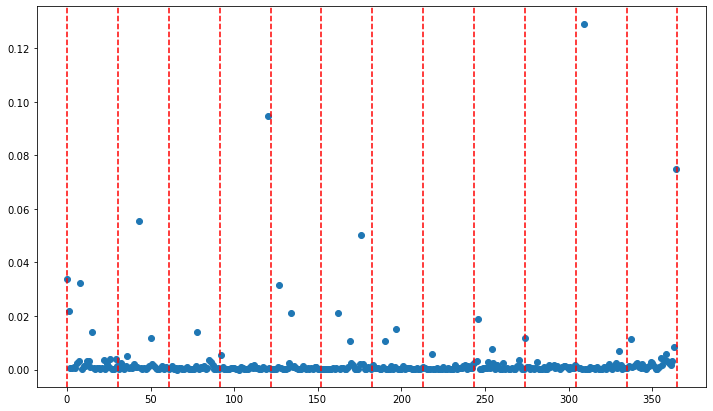

In [111]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(13)*30.42:
    plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

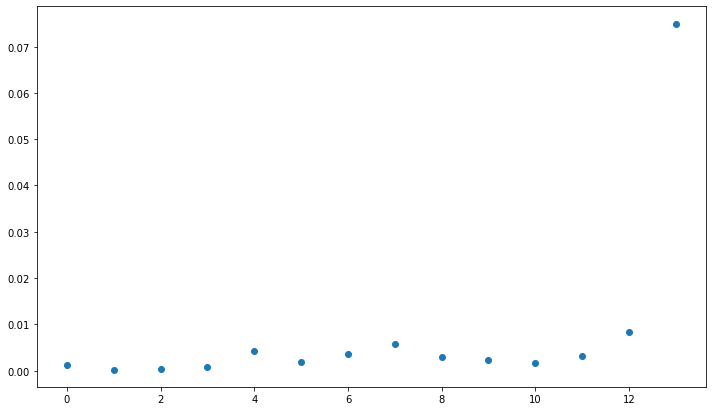

In [112]:
# Veo los últimos 7 días del gráfico
plt.figure(figsize = (12,7))
plt.scatter(np.arange(14),np.abs(rf.feature_importances_[-14:]))
plt.show()

#### Prophet - Extra

In [113]:
from fbprophet import Prophet


In [114]:
prophet = Prophet()

In [115]:
#from prophet.diagnostics import performance_metrics

In [116]:
dataset_efvo_telepase

cantidad_pasos
fecha                     
2016-01-01         34924.0
2016-01-02         48481.0
2016-01-03         49588.0
2016-01-04         86048.0
2016-01-05         86814.0
...                    ...
2019-12-27         97217.0
2019-12-28         59664.0
2019-12-29         48836.0
2019-12-30         81524.0
2019-12-31         41679.0

[1461 rows x 1 columns]

In [117]:
ts = pd.DataFrame({'ds':dataset_efvo_telepase.index,'y':dataset_efvo_telepase.cantidad_pasos})

In [118]:
ts

ds        y
fecha                         
2016-01-01 2016-01-01  34924.0
2016-01-02 2016-01-02  48481.0
2016-01-03 2016-01-03  49588.0
2016-01-04 2016-01-04  86048.0
2016-01-05 2016-01-05  86814.0
...               ...      ...
2019-12-27 2019-12-27  97217.0
2019-12-28 2019-12-28  59664.0
2019-12-29 2019-12-29  48836.0
2019-12-30 2019-12-30  81524.0
2019-12-31 2019-12-31  41679.0

[1461 rows x 2 columns]

In [119]:
prophet.fit(ts)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [120]:
future = prophet.make_future_dataframe(periods=365*5)
prediction = prophet.predict(future)

In [121]:
prediction.head()

ds         trend    yhat_lower     yhat_upper   trend_lower  \
0 2016-01-01  88537.452980  70514.791312  105026.459672  88537.452980   
1 2016-01-02  88541.252593  41133.436778   75385.243873  88541.252593   
2 2016-01-03  88545.052207  31953.453473   66344.560467  88545.052207   
3 2016-01-04  88548.851820  60621.637549   94369.615816  88548.851820   
4 2016-01-05  88552.651434  66923.599337  100198.056867  88552.651434   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  88537.452980       43.828152             43.828152             43.828152   
1  88541.252593   -29978.165542         -29978.165542         -29978.165542   
2  88545.052207   -39469.208135         -39469.208135         -39469.208135   
3  88548.851820   -10240.471681         -10240.471681         -10240.471681   
4  88552.651434    -5595.666725          -5595.666725          -5595.666725   

         weekly  weekly_lower  weekly_upper        yearly  yearly_lower  \
0  11532.981286  11532.981286  11532.981286 -11489.153134 -11489.153134   
1 -17981.725130 -17981.725130 -17981.725130 -11996.440412 -11996.440412   
2 -27066.931580 -27066.931580 -27066.931580 -12402.276555 -12402.276555   
3   2463.576725   2463.576725   2463.576725 -12704.048406 -12704.048406   
4   7305.371531   7305.371531   7305.371531 -12901.038256 -12901.038256   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0 -11489.153134                   0.0                         0.0   
1 -11996.440412                   0.0                         0.0   
2 -12402.276555                   0.0                         0.0   
3 -12704.048406                   0.0                         0.0   
4 -12901.038256                   0.0                         0.0   

   multiplicative_terms_upper          yhat  
0                         0.0  88581.281132  
1                         0.0  58563.087051  
2                         0.0  49075.844071  
3                         0.0  78308.380139  
4                         0.0  82956.984708

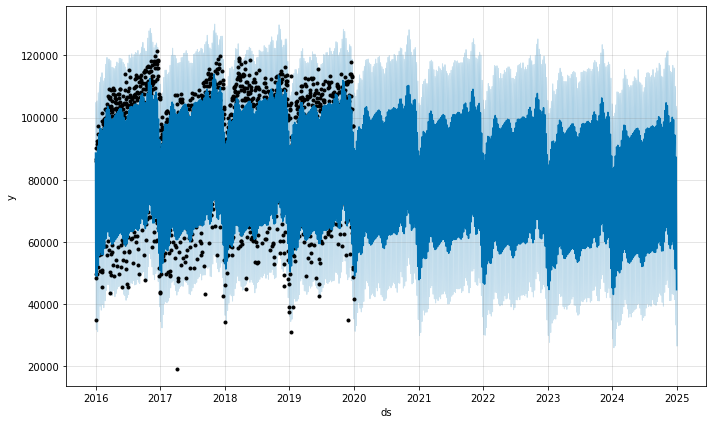

In [122]:
fig = prophet.plot(prediction)

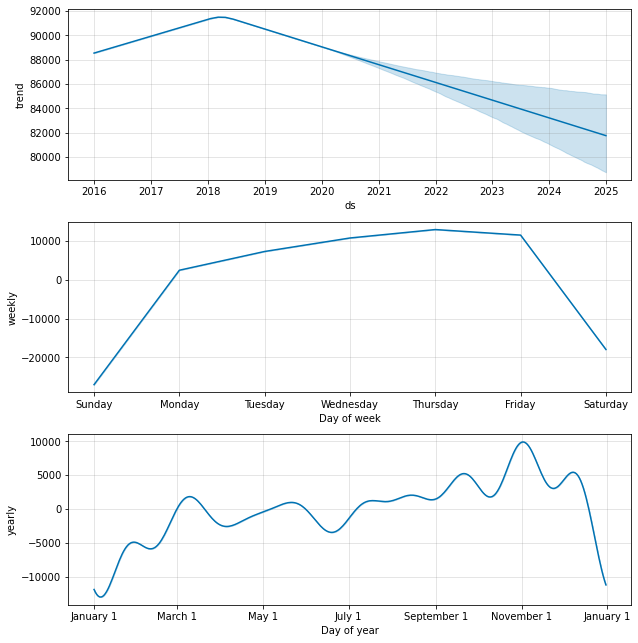

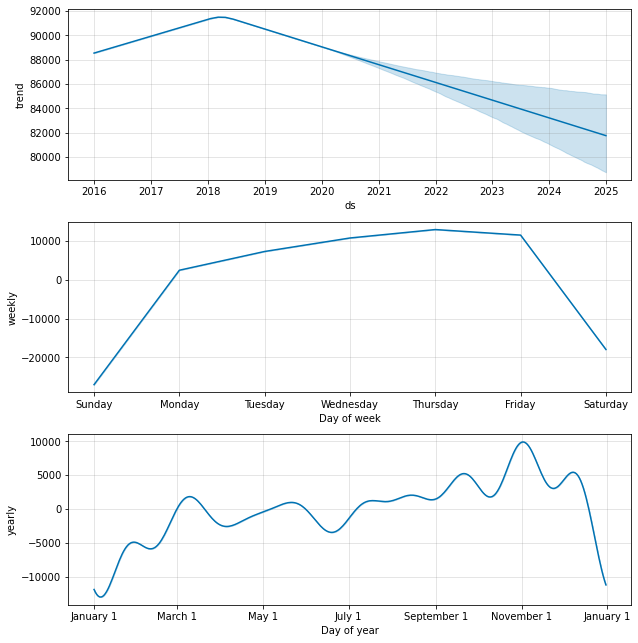

In [123]:
prophet.plot_components(prediction)